Environment Setup

In [ ]:
!pip install gymnasium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 12.9 MB/s eta 0:00:00


In [ ]:
#%matplotlib notebook
%matplotlib inline
!pip install pillow
import numpy as np
import gymnasium as gym # FrozenLake enviroment
import time
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import animation

In [ ]:
# Initialize the environment
env = gym.make("FrozenLake-v1", is_slippery=False) #each action exactly
n_states = env.observation_space.n
n_actions = env.action_space.n
grid_size = int(np.sqrt(n_states))  # Define grid size

In [ ]:
# Initialize Q-table
Q_table = np.zeros((n_states, n_actions))

In [ ]:
# Hyperparameters
alpha = 0.05  # Learning rate - new value = 5% from update.
gamma = 0.99  # Discount factor - emphasis on long-term rewards
epsilon = 0.9  # Initial epsilon for exploration - all actions are random
epsilon_min = 0.00005  # Minimum epsilon ϵ, to ensure that research continues, although rarely
epsilon_decay = 0.9995  # Decay rate for epsilon
n_episodes = 5000  # Number of episodes
max_steps = 100  # Max steps per episode

In [ ]:
# Training the agent
q_tables_history = {}
rewards_per_episode = []
for episode in range(n_episodes):
    state, info = env.reset()  # Reset environment and get initial state
    total_rewards = 0 #sum rewords for one episode

    for step in range(max_steps):
        # Choose action using ε-greedy policy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Explore: random action
        else:
            action = np.argmax(Q_table[state, :])  # Exploit: best action

        # Take action, observe next state and reward
        next_state, reward, done, truncated, info = env.step(action) # truncated - is it interrupted ? f.ex. max steps

        # Update Q-value using the Q-learning formula
        Q_table[state, action] = Q_table[state, action] + alpha * (
            reward + gamma * np.max(Q_table[next_state, :]) - Q_table[state, action]
        )

        state = next_state
        total_rewards += reward

        if done:
            break

    # Decay epsilon to reduce exploration over time
    epsilon = max(epsilon_min, epsilon * epsilon_decay) #Guarantees that ϵ will not fall below the minimum value

    rewards_per_episode.append(total_rewards)

        # Add condition to print Q_table at specific episodes
    if episode + 1 in [100, 500, 2000, n_episodes]: # Steps
      q_tables_history[episode + 1] = np.copy(Q_table) #Save

    if (episode + 1) % 500 == 0:
      print(f"Episode {episode + 1}: Average Reward: {np.mean(rewards_per_episode[-500:])}")

Episode 500: Average Reward: 0.114
Episode 1000: Average Reward: 0.264
Episode 1500: Average Reward: 0.432
Episode 2000: Average Reward: 0.592
Episode 2500: Average Reward: 0.682
Episode 3000: Average Reward: 0.744
Episode 3500: Average Reward: 0.786
Episode 4000: Average Reward: 0.832
Episode 4500: Average Reward: 0.902
Episode 5000: Average Reward: 0.92


In [ ]:
print(q_tables_history.keys()) # Save Q-tables by different steps

dict_keys([100, 500, 2000, 5000])


In [ ]:
# For anolyse on steps (100, 500, 2000)
for step, q_table in q_tables_history.items():
    print(f"Q_table after {step} episodes:")
    #display(pd.DataFrame(q_table, columns=['Left', 'Down', 'Right', 'Up']))

Q_table after 100 episodes:
Q_table after 500 episodes:
Q_table after 2000 episodes:
Q_table after 5000 episodes:


<ipython-input-9-73b8f257022c>:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


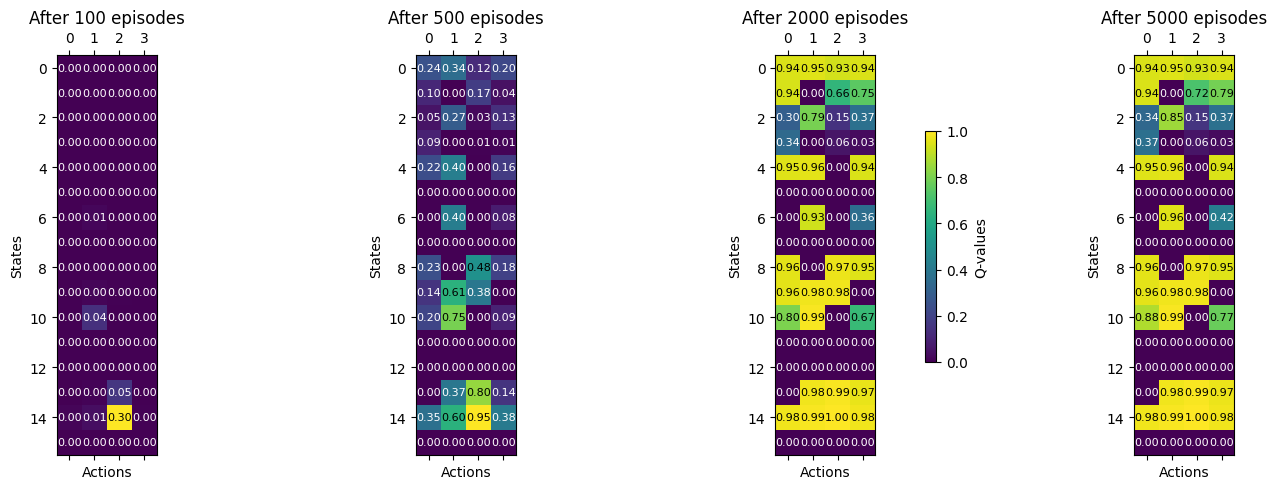

In [ ]:
# Figure with some subplot (in one string)
fig, axes = plt.subplots(1, len(q_tables_history), figsize=(15, 5))  # len(q_tables_history) определяет количество столбцов

#  Heatmap for each Q-table
for ax, (step, q_table) in zip(axes, q_tables_history.items()):
    im = ax.matshow(q_table, cmap="viridis")
    ax.set_title(f"After {step} episodes")
    ax.set_xlabel("Actions")
    ax.set_ylabel("States")

    # Add Q-value in each cells
    for (i, j), val in np.ndenumerate(q_table):
        ax.text(j, i, f"{val:.2f}", ha='center', va='center',
                color="white" if val < (q_table.max() / 2) else "black", fontsize=8)

# Colorbar for all heatmap
fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6, label="Q-values")

# Distances between graphs
plt.tight_layout()

plt.show()



In [ ]:
# Chech the differences between tables
steps = list(q_tables_history.keys())
for i in range(len(steps) - 1):
    step1, step2 = steps[i], steps[i + 1]
    diff = np.sum(np.abs(q_tables_history[step1] - q_tables_history[step2]))
    print(f"Difference between Q_table at {step1} and {step2} episodes: {diff}")

Difference between Q_table at 100 and 500 episodes: 9.303410368228095
Difference between Q_table at 500 and 2000 episodes: 17.716378638000002
Difference between Q_table at 2000 and 5000 episodes: 0.5059832518926857


In [ ]:
if episode % 100 == 0:
    print(f"Max Q-value at episode {episode}: {np.max(Q_table)}")
    print(f"Min Q-value at episode {episode}: {np.min(Q_table)}")

In [ ]:
# Display final Q-table
print("\nFinal Q-table:")
Q_table


Final Q-table:


array([[0.94148015, 0.95099005, 0.93206458, 0.94148015],
       [0.94148006, 0.        , 0.71776222, 0.78993152],
       [0.33591121, 0.85353807, 0.15477688, 0.36863796],
       [0.36861312, 0.        , 0.05757067, 0.03055933],
       [0.95099004, 0.96059601, 0.        , 0.94148013],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.95542461, 0.        , 0.42331797],
       [0.        , 0.        , 0.        , 0.        ],
       [0.96059598, 0.        , 0.970299  , 0.95098936],
       [0.96059368, 0.9801    , 0.98009589, 0.        ],
       [0.88069628, 0.99      , 0.        , 0.77010398],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.98009668, 0.99      , 0.97029264],
       [0.98008204, 0.9899985 , 1.        , 0.98008913],
       [0.        , 0.        , 0.        , 0.        ]])

In [ ]:
# Test the trained agent
state, info = env.reset()
env.render() # Current state of the environment
time.sleep(1) # For visibility

for step in range(max_steps):
    action = np.argmax(Q_table[state, :])  # Always choose the best action
    next_state, reward, done, truncated, info = env.step(action)
    env.render()
    time.sleep(0.5) # For animation
    state = next_state
    if done:
        if reward == 1:
            print("Goal reached!")
        else:
            print("Fell into a hole!")
        break

/usr/local/lib/python3.10/dist-packages/gymnasium/envs/toy_text/frozen_lake.py:329: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("FrozenLake-v1", render_mode="rgb_array")
  gym.logger.warn(


Goal reached!


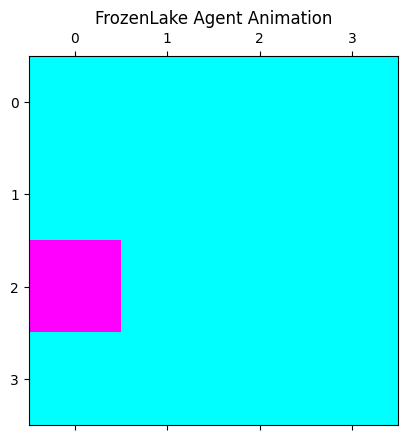

In [ ]:
#state = env.reset() # Reset environment and get initial state

fig, ax = plt.subplots()
grid = np.zeros((grid_size, grid_size))
agent_position = ax.matshow(grid, cmap="cool", vmin=0, vmax=1)
ax.set_title("FrozenLake Agent Animation")

state, info = env.reset()  # Reset state for animation
def update(frame):
    global state

    action = np.argmax(Q_table[state, :]) #action
    next_state, reward, done, truncated, info = env.step(action)

    grid = np.zeros((grid_size, grid_size)) # Grid for animation
    grid[state // grid_size, state % grid_size] = 1  # Current position for agent

    agent_position.set_array(grid)  # Update thegrid
    state = next_state  # Next stage

    # If the episode is completed, start again
    if done:
        env.reset()

    return agent_position,

ani = animation.FuncAnimation(fig, update, frames=max_steps, interval=500, blit=False)

ani.save('frozenlake_animation_6.gif', writer='pillow')

plt.show()

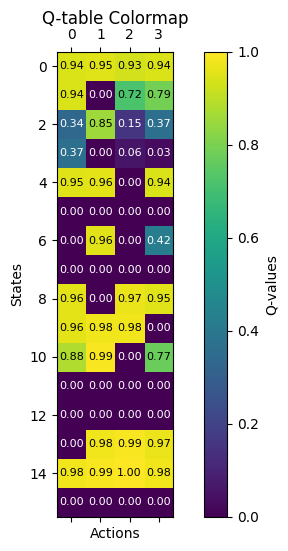

In [ ]:
plt.figure(figsize=(8, 6))
im = plt.matshow(Q_table, cmap="viridis", fignum=1)
plt.colorbar(im, label="Q-values")
plt.title("Q-table Colormap", pad=20)
plt.xlabel("Actions")
plt.ylabel("States")

# # Add values Q-value into cells
for (i, j), val in np.ndenumerate(Q_table):
    plt.text(j, i, f"{val:.2f}", ha='center', va='center',
             color="white" if val < (Q_table.max() / 2) else "black", fontsize=8)

plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # Margins
plt.show()

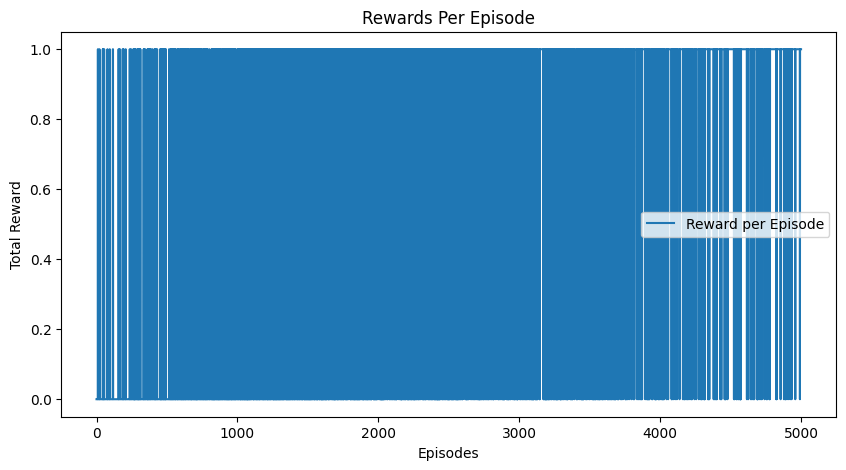

In [ ]:
# Plot of the reward per episode
plt.figure(figsize=(10, 5))
plt.plot(rewards_per_episode, label="Reward per Episode")
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("Rewards Per Episode")
plt.legend()
plt.show()


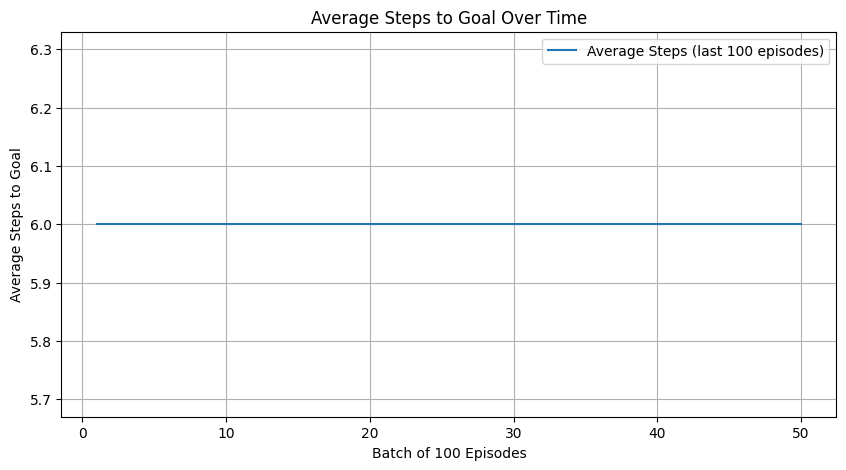

In [ ]:
# Collect number of steps per episode
steps_per_episode = []

for episode in range(n_episodes):
    state, info = env.reset()
    steps = 0

    for step in range(max_steps):
        action = np.argmax(Q_table[state, :])  # The best action
        next_state, reward, done, truncated, info = env.step(action)
        steps += 1
        state = next_state

        if done:
            break

    # If agent did't arrive to the goal, max steps
    if reward == 0:
        steps = max_steps
    steps_per_episode.append(steps)

# Averaging each 100 episodes
avg_steps_last_100 = [np.mean(steps_per_episode[i:i + 100]) for i in range(0, len(steps_per_episode), 100)]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(avg_steps_last_100) + 1), avg_steps_last_100, label="Average Steps (last 100 episodes)")
plt.xlabel("Batch of 100 Episodes")
plt.ylabel("Average Steps to Goal")
plt.title("Average Steps to Goal Over Time")
plt.legend()
plt.grid(True)
plt.show()
